In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Matplotlib Formatting Charts

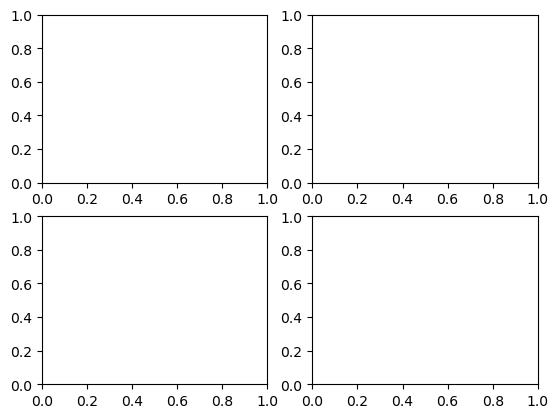

In [2]:
# plt.subplots(no. of rows for graphs, no. of graphs in each row)

fig, ax = plt.subplots(2, 2)

<Axes: xlabel='job_title_short'>

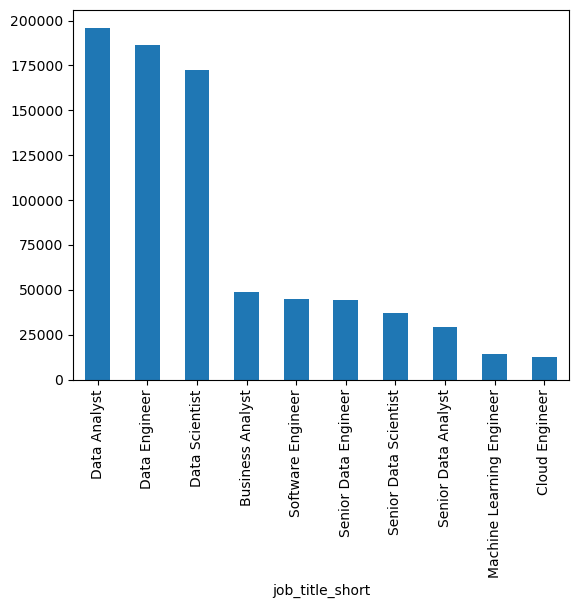

In [3]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind= 'bar', ax= ax)

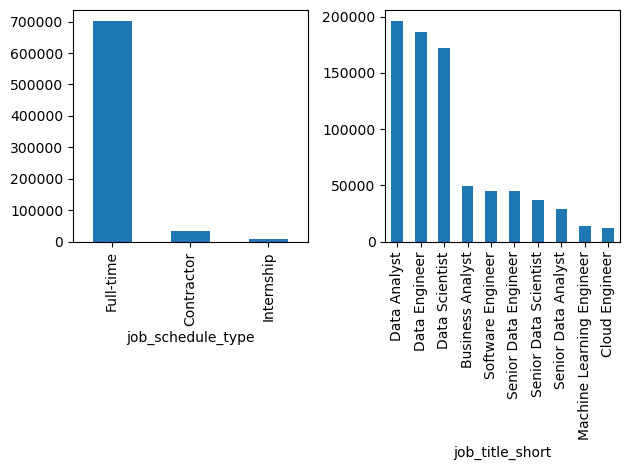

In [4]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind= 'bar', ax= ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind= 'bar', ax= ax[0])

plt.tight_layout()
plt.show()

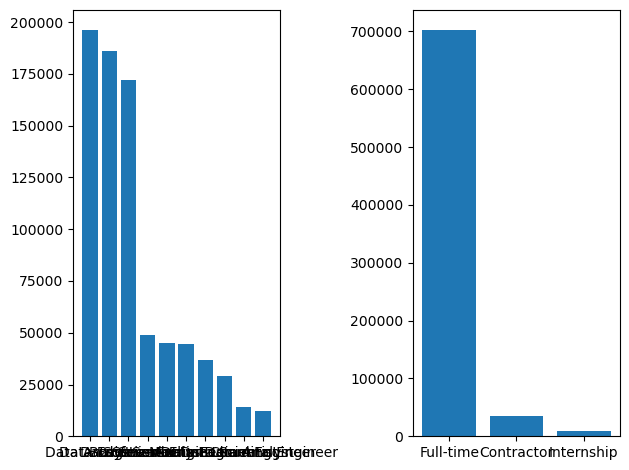

In [5]:
fig, ax = plt.subplots(1,2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

plt.tight_layout()
plt.show()

## Example - Counts of Top Skills in Job Postings

In [7]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values('skill_count', ascending= False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


### Plot job skills count by each job position

In [29]:
job_titles = ["Data Scientist", "Data Engineer", "Data Analyst"]

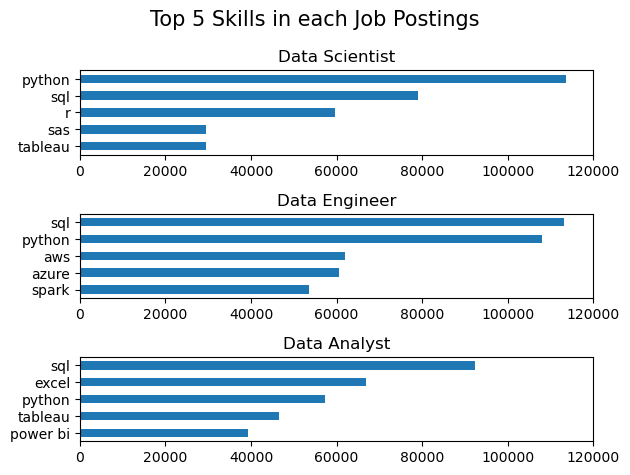

In [65]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', 
                 x= 'job_skills', 
                 y= 'skill_count', 
                 ax= ax[i],
                 title= job_title)
    ax[i].invert_yaxis() # Changes the order of the Y-axis values
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

    fig.suptitle("Top 5 Skills in each Job Postings", fontsize= 15)
    fig.tight_layout()